In [44]:
# Import Necessary Libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.preprocessing import MinMaxScaler

#for deep learning
import keras
import keras.backend as k
from keras.models import Sequential
from keras.layers import Dense, LSTM, Activation, Masking, Dropout
from keras.optimizers import RMSprop,Adam
from keras.callbacks import History
from keras import callbacks

### Read Train and Test Processed Data

In [45]:
train_data = pd.read_csv('../processed_data/train_group_without_FE.csv')
test_data = pd.read_csv('../processed_data/test_group_without_FE.csv')

In [46]:
# Replace NaN with a Default Value (0)
train_data = train_data.fillna(0)
test_data = test_data.fillna(0)

In [47]:
# Print train dataset
train_data

,unit_nr,time_cycles,s_2,s_3,s_4,s_7,s_8,s_9,s_11,s_12,s_13,s_14,s_15,s_17,s_20,s_21,RUL
0,1,1,0.183735,0.406802,0.309757,0.726248,0.242424,0.109755,0.369048,0.633262,0.205882,0.199608,0.363986,0.333333,0.713178,0.724662,125
1,1,2,0.283133,0.453019,0.352633,0.628019,0.212121,0.100242,0.380952,0.765458,0.279412,0.162813,0.411312,0.333333,0.666667,0.731014,125
2,1,3,0.343373,0.369523,0.370527,0.710145,0.272727,0.140043,0.250000,0.795309,0.220588,0.171793,0.357445,0.166667,0.627907,0.621375,125
3,1,4,0.343373,0.256159,0.331195,0.740741,0.318182,0.124518,0.166667,0.889126,0.294118,0.174889,0.166603,0.333333,0.573643,0.662386,125
4,1,5,0.349398,0.257467,0.404625,0.668277,0.242424,0.149960,0.255952,0.746269,0.235294,0.174734,0.402078,0.416667,0.589147,0.704502,125
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20626,100,196,0.686747,0.587312,0.782917,0.254428,0.439394,0.196491,0.726190,0.170576,0.558824,0.194344,0.656791,0.750000,0.271318,0.109500,4
20627,100,197,0.701807,0.729453,0.866475,0.162641,0.500000,0.194651,0.708333,0.211087,0.500000,0.188668,0.727203,0.583333,0.124031,0.366197,3
20628,100,198,0.665663,0.684979,0.775321,0.175523,0.515152,0.198196,0.738095,0.281450,0.529412,0.212148,0.922278,0.833333,0.232558,0.053991,2
20629,100,199,0.608434,0.746021,0.747468,0.133655,0.530303,0.233285,0.916667,0.208955,0.514706,0.203065,0.823394,0.583333,0.116279,0.234466,1


In [48]:
# Print train dataset
test_data

,unit_nr,time_cycles,s_2,s_3,s_4,s_7,s_8,s_9,s_11,s_12,s_13,s_14,s_15,s_17,s_20,s_21
0,1,1,0.596215,0.421968,0.282214,0.608871,0.365854,0.196475,0.273973,0.534247,0.325581,0.152259,0.347076,0.375,0.500000,0.620099
1,1,2,0.182965,0.504025,0.225240,0.800403,0.292683,0.229042,0.479452,0.634703,0.395349,0.277907,0.227709,0.500,0.645455,0.645718
2,1,3,0.419558,0.464814,0.346130,0.651210,0.390244,0.248506,0.479452,0.591324,0.325581,0.192892,0.533557,0.500,0.700000,0.681104
3,1,4,0.413249,0.391587,0.449867,0.643145,0.341463,0.159080,0.328767,0.456621,0.372093,0.217896,0.282359,0.250,0.627273,0.620382
4,1,5,0.435331,0.471306,0.357974,0.661290,0.292683,0.153410,0.349315,0.632420,0.325581,0.187891,0.337009,0.125,0.618182,0.676008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13091,100,194,0.665615,0.789665,0.641209,0.510081,0.317073,0.902989,0.609589,0.299087,0.255814,0.935703,0.664909,0.625,0.309091,0.370842
13092,100,195,0.659306,0.692028,0.769042,0.471774,0.390244,0.890038,0.547945,0.381279,0.465116,0.914003,0.567593,0.750,0.236364,0.483652
13093,100,196,0.728707,0.626071,0.458036,0.435484,0.536585,0.937011,0.527397,0.410959,0.348837,0.971066,0.594919,0.750,0.281818,0.381741
13094,100,197,0.671924,0.673851,0.714111,0.502016,0.439024,0.952644,0.554795,0.445205,0.441860,1.000000,0.662991,0.750,0.318182,0.473461


In [49]:
# Check shape
print(train_data.shape)
print(test_data.shape)

(20631, 17)
(13096, 16)


In [50]:
# Load original RUL values
y_true = pd.read_csv("../raw_data/RUL_FD001.txt", delim_whitespace=True,names=["RUL"])


In [51]:
y_true.head()

,RUL
0,112
1,98
2,69
3,82
4,91


In [52]:
y_true["unit_number"] = y_true.index

In [53]:
# Print train dataset
y_true.head()

,RUL,unit_number
0,112,0
1,98,1
2,69,2
3,82,3
4,91,4


In [54]:
# Check the shape of Y_TRUE
print(y_true.shape)

(100, 2)


# MinMax scaling

### For training Data

In [55]:
# Define the feature columns for scaling (excluding 'RUL' and 'unit_number')
train_columns = [column for column in train_data.columns if column not in ['RUL', 'unit_number']]

# Apply MinMax scaling to the training data
min_max_scaler = MinMaxScaler(feature_range=(-1, 1))
train_data[train_columns] = min_max_scaler.fit_transform(train_data[train_columns])

# Check the shape of the training data
print(train_data.shape)

# Verify the first few rows of the training data
train_data.head()

(20631, 17)


,unit_nr,time_cycles,s_2,s_3,s_4,s_7,s_8,s_9,s_11,s_12,s_13,s_14,s_15,s_17,s_20,s_21,RUL
0,-1.0,-1.000000,-0.632530,-0.186396,-0.380486,0.452496,-0.515152,-0.780490,-0.261905,0.266525,-0.588235,-0.600784,-0.272028,-0.333333,0.426357,0.449323,125
1,-1.0,-0.994460,-0.433735,-0.093961,-0.294733,0.256039,-0.575758,-0.799515,-0.238095,0.530917,-0.441176,-0.674373,-0.177376,-0.333333,0.333333,0.462027,125
2,-1.0,-0.988920,-0.313253,-0.260955,-0.258947,0.420290,-0.454545,-0.719914,-0.500000,0.590618,-0.558824,-0.656414,-0.285110,-0.666667,0.255814,0.242751,125
3,-1.0,-0.983380,-0.313253,-0.487683,-0.337610,0.481481,-0.363636,-0.750965,-0.666667,0.778252,-0.411765,-0.650222,-0.666795,-0.333333,0.147287,0.324772,125
4,-1.0,-0.977839,-0.301205,-0.485066,-0.190749,0.336554,-0.515152,-0.700081,-0.488095,0.492537,-0.529412,-0.650532,-0.195845,-0.166667,0.178295,0.409003,125


### For test data

In [56]:
# Define the feature columns for scaling (excluding 'RUL' and 'unit_number')
test_columns = [column for column in test_data.columns if column not in ['RUL', 'unit_number']]

# Apply MinMax scaling to the training data
min_max_scaler = MinMaxScaler(feature_range=(-1, 1))
test_data[test_columns] = min_max_scaler.fit_transform(test_data[test_columns])

# Check the shape of the training data
print(test_data.shape)

# Verify the first few rows of the training data
test_data.head()

(13096, 16)


,unit_nr,time_cycles,s_2,s_3,s_4,s_7,s_8,s_9,s_11,s_12,s_13,s_14,s_15,s_17,s_20,s_21
0,-1.0,-1.000000,0.192429,-0.156063,-0.435573,0.217742,-0.268293,-0.607050,-0.452055,0.068493,-0.348837,-0.695481,-0.305849,-0.25,0.000000,0.240198
1,-1.0,-0.993377,-0.634069,0.008050,-0.549520,0.600806,-0.414634,-0.541916,-0.041096,0.269406,-0.209302,-0.444186,-0.544583,0.00,0.290909,0.291437
2,-1.0,-0.986755,-0.160883,-0.070371,-0.307739,0.302419,-0.219512,-0.502989,-0.041096,0.182648,-0.348837,-0.614217,0.067114,0.00,0.400000,0.362208
3,-1.0,-0.980132,-0.173502,-0.216827,-0.100265,0.286290,-0.317073,-0.681839,-0.342466,-0.086758,-0.255814,-0.564208,-0.435283,-0.50,0.254545,0.240764
4,-1.0,-0.973510,-0.129338,-0.057388,-0.284051,0.322581,-0.414634,-0.693180,-0.301370,0.264840,-0.348837,-0.624219,-0.325983,-0.75,0.236364,0.352017


### LSTM expects an input in the shape of a numpy array of 3 dimensions and I will need to convert train and test data accordingly.

In [57]:
def gen_train(data, seq_length, seq_cols):
    """
        function to prepare train data into (samples, time steps, features)
        id_df = train dataframe
        seq_length = look back period
        seq_cols = feature columns
    """
        
    data_array = data[seq_cols].values
    num_elements = data_array.shape[0]
    lstm_array=[]
    
    for start, stop in zip(range(0, num_elements-seq_length+1), range(seq_length, num_elements+1)):
        lstm_array.append(data_array[start:stop, :])
    
    return np.array(lstm_array)

### Let's extract sequence columns

In [58]:
seq_cols = [column for column in train_data.columns if column !="RUL"]
print(seq_cols)

['unit_nr', 'time_cycles', 's_2', 's_3', 's_4', 's_7', 's_8', 's_9', 's_11', 's_12', 's_13', 's_14', 's_15', 's_17', 's_20', 's_21']


In [59]:
data_array = train_data[seq_cols].values
data_array

array([[-1.        , -1.        , -0.63253012, ..., -0.33333333,
         0.42635659,  0.44932339],
       [-1.        , -0.99445983, -0.43373494, ..., -0.33333333,
         0.33333333,  0.46202706],
       [-1.        , -0.98891967, -0.31325301, ..., -0.66666667,
         0.25581395,  0.24275062],
       ...,
       [ 1.        ,  0.09141274,  0.3313253 , ...,  0.66666667,
        -0.53488372, -0.89201878],
       [ 1.        ,  0.09695291,  0.21686747, ...,  0.16666667,
        -0.76744186, -0.53106877],
       [ 1.        ,  0.10249307,  0.59036145, ...,  0.33333333,
        -0.64341085, -0.56365645]])

In [60]:
# Target Generator
def gen_target(id_df, seq_length, label):
    data_array = id_df[label].values
    num_elements = data_array.shape[0]
    return data_array[seq_length-1:num_elements+1]

In [61]:
# Test generator
def gen_test(id_df, seq_length, seq_cols, mask_value):
    """
        function to prepare test data into (samples, time steps, features)
        function only returns last sequence of data for every unit
        id_df = test dataframe
        seq_length = look back period
        seq_cols = feature columns
    """
    df_mask = pd.DataFrame(np.zeros((seq_length-1,id_df.shape[1])),columns=id_df.columns)
    df_mask[:] = mask_value
    
#     id_df = df_mask.append(id_df,ignore_index=True)
    id_df = pd.concat([df_mask, id_df], ignore_index=True)

    
    data_array = id_df[seq_cols].values
    num_elements = data_array.shape[0]
    lstm_array=[]
    
    start = num_elements-seq_length
    stop = num_elements
    
    lstm_array.append(data_array[start:stop, :])
    
    return np.array(lstm_array)

In [62]:
sequence_length = 50
mask_value = 0

In [63]:
#generate train
x_train=np.concatenate(list(list(gen_train(train_data[train_data['unit_nr']==unit], sequence_length, seq_cols)) for unit in train_data['unit_nr'].unique()))
print(x_train.shape)

(15731, 50, 16)


In [64]:
#generate target of train
y_train = np.concatenate(list(list(gen_target(train_data[train_data['unit_nr']==unit], sequence_length, "RUL")) for unit in train_data['unit_nr'].unique()))
y_train.shape

(15731,)

In [65]:
#generate test
x_test=np.concatenate(list(list(gen_test(test_data[test_data['unit_nr']==unit], sequence_length, seq_cols, mask_value)) for unit in test_data['unit_nr'].unique()))
print(x_test.shape)

(100, 50, 16)


In [66]:
#true target of test 
y_test = y_true.RUL.values
y_test.shape

(100,)

# LSTM Model and Hyper-parameters

In [67]:
nb_features = x_train.shape[2]
nb_out = 1
print(nb_features)

16


In [68]:
# Define custom learning rate (e.g., 0.001)
custom_learning_rate = 0.001

# Create an optimizer with the custom learning rate
custom_optimizer = Adam(learning_rate=custom_learning_rate)

### LSTM model

In [69]:
history = History()

model = Sequential()
model.add(LSTM(
         units=100,
         return_sequences=True,
         input_shape=(sequence_length, nb_features)))
model.add(Dropout(0.2))
model.add(LSTM(
          units=100,
          return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(units=1, activation='relu'))
model.add(Activation("relu"))
model.compile(loss="mse", optimizer=custom_optimizer, metrics=['mse'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 50, 100)           46800     
                                                                 
 dropout_2 (Dropout)         (None, 50, 100)           0         
                                                                 
 lstm_3 (LSTM)               (None, 100)               80400     
                                                                 
 dropout_3 (Dropout)         (None, 100)               0         
                                                                 
 dense_1 (Dense)             (None, 1)                 101       
                                                                 
 activation_1 (Activation)   (None, 1)                 0         
                                                                 
Total params: 127,301
Trainable params: 127,301
Non-tr

In [70]:
%%time
# Fit the model without early stopping
model.fit(x_train, y_train, epochs=100, batch_size=64, validation_split=0.1, verbose=1, callbacks=[history])


Epoch 1/100
222/222 [==============================] - 10s 36ms/step - loss: 4734.6265 - mse: 4734.6265 - val_loss: 4170.0820 - val_mse: 4170.0820
Epoch 2/100
222/222 [==============================] - 7s 33ms/step - loss: 2988.7793 - mse: 2988.7793 - val_loss: 2812.8325 - val_mse: 2812.8325
Epoch 3/100
222/222 [==============================] - 7s 32ms/step - loss: 2169.6226 - mse: 2169.6226 - val_loss: 2109.9507 - val_mse: 2109.9507
Epoch 4/100
222/222 [==============================] - 7s 33ms/step - loss: 1821.1959 - mse: 1821.1959 - val_loss: 1784.2428 - val_mse: 1784.2428
Epoch 5/100
222/222 [==============================] - 7s 33ms/step - loss: 1699.5690 - mse: 1699.5690 - val_loss: 1645.0338 - val_mse: 1645.0338
Epoch 6/100
222/222 [==============================] - 7s 33ms/step - loss: 1660.9528 - mse: 1660.9528 - val_loss: 1589.2760 - val_mse: 1589.2760
Epoch 7/100
222/222 [==============================] - 7s 33ms/step - loss: 1473.0427 - mse: 1473.0427 - val_loss: 1010.649

Epoch 59/100
222/222 [==============================] - 7s 33ms/step - loss: 32.0789 - mse: 32.0789 - val_loss: 189.4117 - val_mse: 189.4117
Epoch 60/100
222/222 [==============================] - 7s 33ms/step - loss: 31.6912 - mse: 31.6912 - val_loss: 219.7963 - val_mse: 219.7963
Epoch 61/100
222/222 [==============================] - 7s 32ms/step - loss: 30.4827 - mse: 30.4827 - val_loss: 225.5969 - val_mse: 225.5969
Epoch 62/100
222/222 [==============================] - 7s 33ms/step - loss: 29.6141 - mse: 29.6141 - val_loss: 236.1964 - val_mse: 236.1964
Epoch 63/100
222/222 [==============================] - 8s 34ms/step - loss: 31.8871 - mse: 31.8871 - val_loss: 254.8122 - val_mse: 254.8122
Epoch 64/100
222/222 [==============================] - 7s 34ms/step - loss: 33.5563 - mse: 33.5563 - val_loss: 229.7023 - val_mse: 229.7023
Epoch 65/100
222/222 [==============================] - 7s 32ms/step - loss: 29.1172 - mse: 29.1172 - val_loss: 192.3952 - val_mse: 192.3952
Epoch 66/100


In [128]:
# %%time
# # Fit the model
# model.fit(x_train, y_train, epochs=100, batch_size=32, validation_split=0.1, verbose=1,
#           callbacks=[history, keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=10, verbose=0, mode='auto')])


### Export and Save MSE values

In [71]:
train_mse = history.history['mse']
val_mse = history.history['val_mse']

In [72]:
# Create a DataFrame to store these values
df = pd.DataFrame({'Epoch': range(1, len(train_mse) + 1), 'Train_MSE': train_mse, 'Val_MSE': val_mse})

In [73]:
# Export the DataFrame to a CSV file using the to_csv method:
df.to_csv('Performaces/Experiment01/training_history01.csv', index=False)

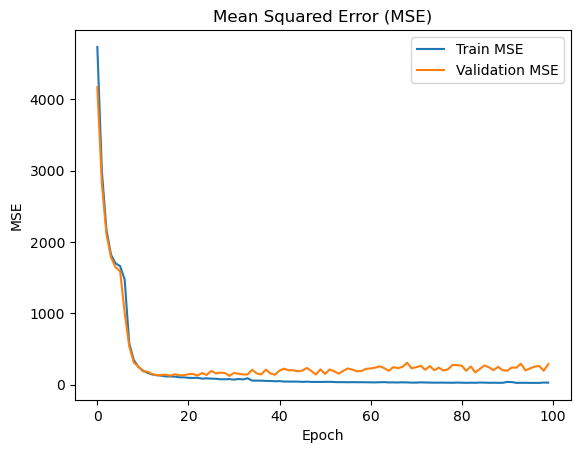

In [74]:
# Plot the training history
plt.plot(history.history['mse'], label='Train MSE')
plt.plot(history.history['val_mse'], label='Validation MSE')
plt.title('Mean Squared Error (MSE)')
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.legend()

# Set a higher resolution (DPI) for the saved figure
plt.savefig('Performaces/Experiment01/mse_plot01.png', dpi=300)  # Adjust 'dpi' as needed

# Show the plot
plt.show()

# Performace Evaluation

In [86]:
# Import metrics libraries
import math
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error

### Create a scoring function

In [87]:
def scoring_function(actual,predicted):
    d = []
    for i in range(len(predicted)):
        d.append((predicted[i] - actual[i]))
    scores = []
    for i in range(len(d)):
        if d[i] >= 0:
            scores.append(math.exp(d[i]/10) - 1)
        else :
            scores.append(math.exp((-1*d[i])/13) - 1)
    return sum(scores)

### OnTrain Set

In [88]:
# Check overall mse on train set
scores = model.evaluate(x_train, y_train, verbose=1, batch_size=200)
print('MSE: {}'.format(scores[1]))

79/79 [==============================] - 2s 26ms/step - loss: 33.0320 - mse: 33.0320
MSE: 33.032039642333984


In [90]:
# Print RMSE and MAE
y_train_pred = model.predict(x_train)

print("root_mean_squared_error >> ", math.sqrt(mean_squared_error(y_train,y_train_pred)))
print("mean_absolute_error >>",mean_absolute_error(y_train,y_train_pred))

492/492 [==============================] - 4s 9ms/step
root_mean_squared_error >>  5.747350528520734
mean_absolute_error >> 2.509244104204959


## On Test Set

In [91]:
# Check overall mse on test set
scores_test = model.evaluate(x_test, y_test, verbose=2)
print('MSE: {}'.format(scores_test[1]))

4/4 - 0s - loss: 1250.0765 - mse: 1250.0765 - 45ms/epoch - 11ms/step
MSE: 1250.0765380859375


In [92]:
# Print RMSE, MAE and S-score
y_pred_test = model.predict(x_test, verbose=0)

print("root_mean_squared_error >> ", math.sqrt(mean_squared_error(y_test,y_pred_test)))
print("mean_absolute_error >>",mean_absolute_error(y_test,y_pred_test))
print("scoring function >>",scoring_function(y_test,y_pred_test))

root_mean_squared_error >>  35.356421497906254
mean_absolute_error >> 29.24611003637314
scoring function >> 3702.4148993813938


### Plot Prediction figure with ground truth

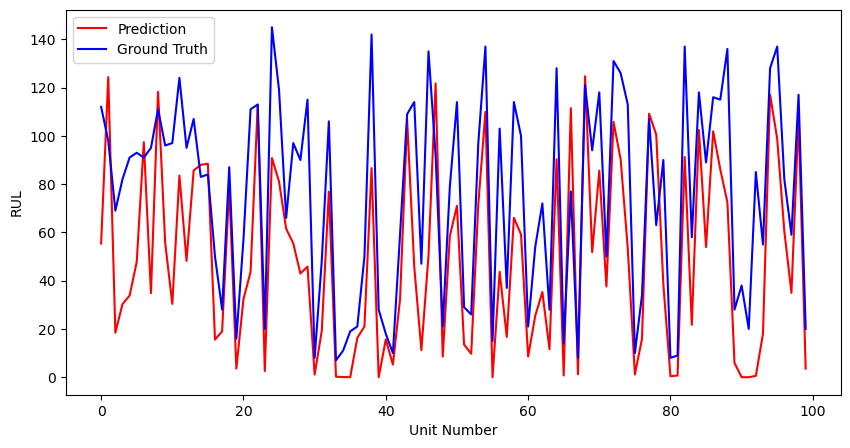

In [93]:
# Plot the predictions and ground truth
plt.figure(figsize=(10, 5))
plt.plot(y_pred_test, color='red', label='Prediction')
plt.plot(y_test, color='blue', label='Ground Truth')
plt.ylabel("RUL")
plt.xlabel("Unit Number")
plt.legend(loc='upper left')

# Set a higher resolution (DPI) for the saved figure
plt.savefig('Performaces/Experiment01/prediction_plot01.png', dpi=300)  # Adjust 'dpi' as needed

# Show the plot
plt.show()